In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display
import io

warnings.filterwarnings('ignore')

# Manual file upload option (for Google Colab)
from google.colab import files

print("Please upload your dataset (CSV, Excel, or TXT).")
uploaded = files.upload()

# Read the uploaded file (auto-detect format)
for filename in uploaded.keys():
    if filename.endswith('.csv'):
        df = pd.read_csv(io.BytesIO(uploaded[filename]))
    elif filename.endswith('.xlsx') or filename.endswith('.xls'):
        df = pd.read_excel(io.BytesIO(uploaded[filename]))
    elif filename.endswith('.txt'):
        df = pd.read_csv(io.BytesIO(uploaded[filename]), delimiter='\t')  # Assuming tab-delimited
    else:
        print("Unsupported file format. Please upload CSV, Excel, or TXT.")
        df = None

if df is not None:
    print(f"Successfully loaded {filename} with shape {df.shape}")
    display(df.head())


Please upload your dataset (CSV, Excel, or TXT).


Saving advertising.csv to advertising.csv
Saving play_tennis.csv to play_tennis.csv
Successfully loaded play_tennis.csv with shape (14, 6)


,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier

# Set seaborn style for better visuals
sns.set(style="whitegrid")

In [3]:
# Load the dataset
df = pd.read_csv('advertising.csv')

# Display basic info and first few rows
print("Dataset Info:")
df.info()
print("\nFirst 5 Rows:")
df.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1005 non-null   float64
 1   Age                       998 non-null    float64
 2   Area Income               998 non-null    float64
 3   Daily Internet Usage      1005 non-null   float64
 4   City                      998 non-null    object 
 5   Gender                    1009 non-null   object 
 6   Country                   996 non-null    object 
 7   Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 63.2+ KB

First 5 Rows:


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Gender,Country,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Wrightburgh,Female,Tunisia,0
1,NaN,31.0,68441.85,193.77,West Jodi,Male,Nauru,0
2,69.47,26.0,59785.94,236.50,Davidton,Female,San Marino,0
3,74.15,29.0,54806.18,245.89,West Terrifurt,Male,Italy,0
4,68.37,35.0,73889.99,225.58,South Manuel,Female,Iceland,0


In [4]:
# Check missing values
print("Missing Values:\n", df.isnull().sum())

# Fill missing values
df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean(), inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Area Income'].fillna(df['Area Income'].mean(), inplace=True)
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean(), inplace=True)
df['City'].fillna(df['City'].mode()[0], inplace=True)
df['Country'].fillna(df['Country'].mode()[0], inplace=True)

# Verify no missing values remain
print("\nMissing Values After Imputation:\n", df.isnull().sum())

Missing Values:
 Daily Time Spent on Site     4
Age                         11
Area Income                 11
Daily Internet Usage         4
City                        11
Gender                       0
Country                     13
Clicked on Ad                0
dtype: int64

Missing Values After Imputation:
 Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
City                        0
Gender                      0
Country                     0
Clicked on Ad               0
dtype: int64


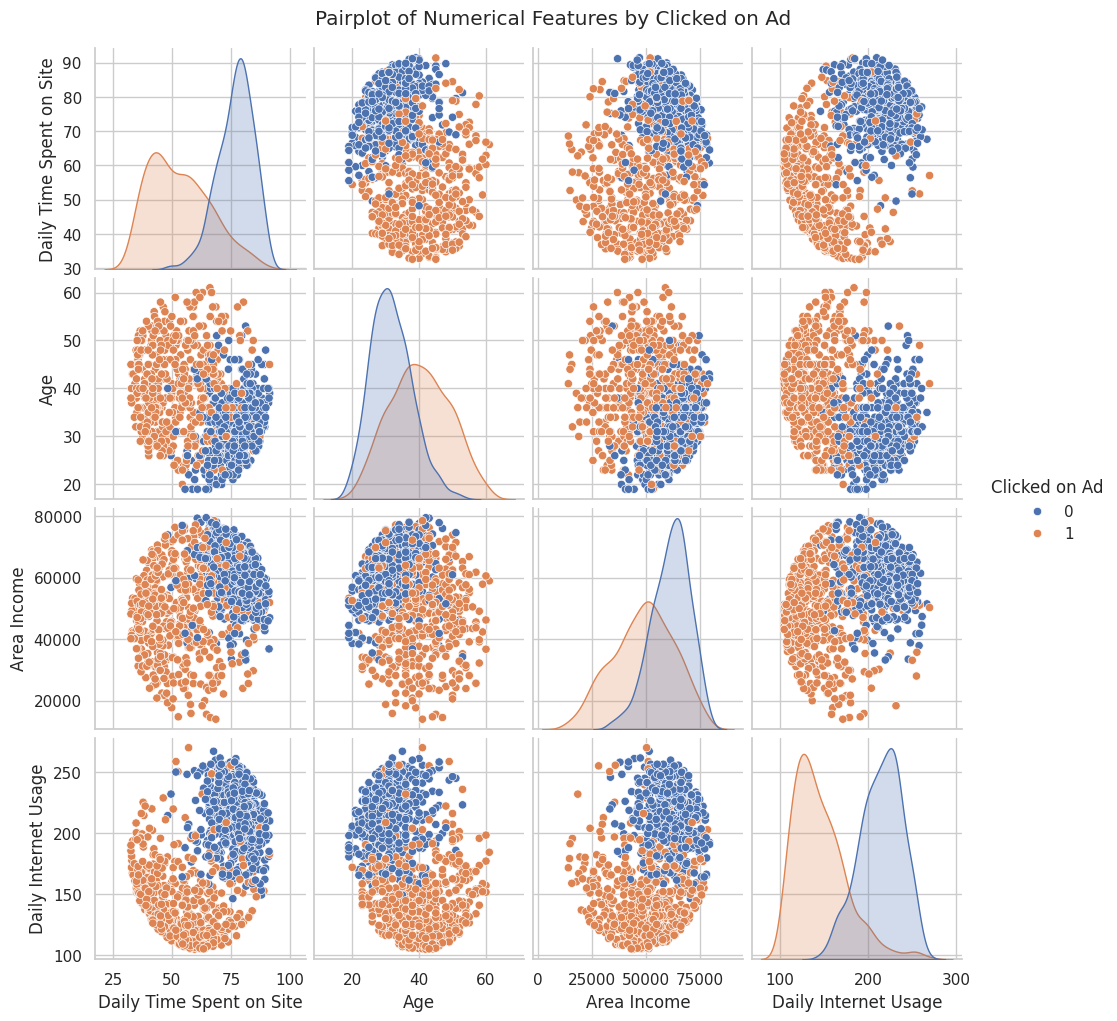

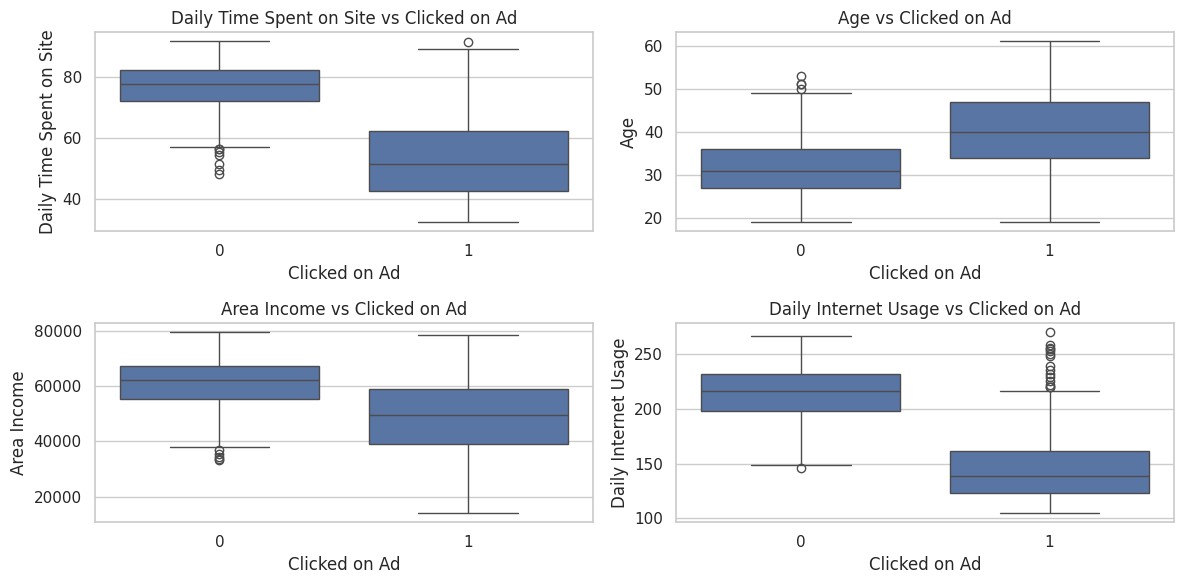

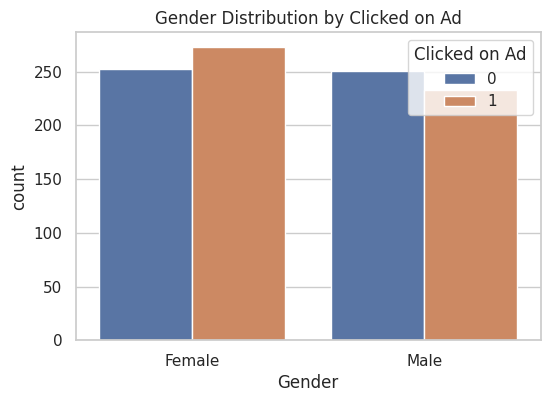

In [5]:
# Pairplot for numerical features
sns.pairplot(df, hue='Clicked on Ad', vars=['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'])
plt.suptitle("Pairplot of Numerical Features by Clicked on Ad", y=1.02)
plt.show()

# Boxplot for numerical features
plt.figure(figsize=(12, 6))
for i, col in enumerate(['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Clicked on Ad', y=col, data=df)
    plt.title(f"{col} vs Clicked on Ad")
plt.tight_layout()
plt.show()

# Countplot for Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Clicked on Ad', data=df)
plt.title("Gender Distribution by Clicked on Ad")
plt.show()

**Insights**:
- Pairplot shows relationships between numerical features and how they separate by ad clicks.
- Boxplots reveal differences in distributions (e.g., users who click ads tend to spend less time on site).
- Gender countplot indicates if clicking behavior varies by gender.

In [6]:
# Encode categorical variables
le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])
df['Country'] = le.fit_transform(df['Country'])
df['Gender'] = le.fit_transform(df['Gender'])

# Define features and target
X = df.drop('Clicked on Ad', axis=1)
y = df['Clicked on Ad']

# Separate numerical and categorical features
numerical_features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
categorical_features = ['City', 'Country', 'Gender']

X_numerical = X[numerical_features]
X_categorical = X[categorical_features]

# Apply MinMaxScaler to all features (to ensure non-negative values for MultinomialNB)
scaler = MinMaxScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)
X_categorical_scaled = scaler.fit_transform(X_categorical)

# Combine scaled features
X_scaled = np.hstack((X_numerical_scaled, X_categorical_scaled))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

**Improvement**:
- Used MinMaxScaler instead of StandardScaler to ensure all values are non-negative, fixing the MultinomialNB issue.
- Encoded categorical variables and combined them with numerical features.

Gaussian Naive Bayes Accuracy: 0.9570957095709571
Confusion Matrix:
 [[151   5]
 [  8 139]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       156
           1       0.97      0.95      0.96       147

    accuracy                           0.96       303
   macro avg       0.96      0.96      0.96       303
weighted avg       0.96      0.96      0.96       303



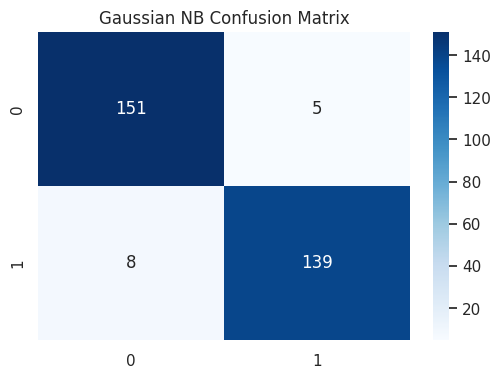

In [7]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

# Evaluate
print("Gaussian Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gnb))
print("Classification Report:\n", classification_report(y_test, y_pred_gnb))

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_gnb), annot=True, fmt='d', cmap='Blues')
plt.title("Gaussian NB Confusion Matrix")
plt.show()

Multinomial Naive Bayes Accuracy: 0.900990099009901
Confusion Matrix:
 [[149   7]
 [ 23 124]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       156
           1       0.95      0.84      0.89       147

    accuracy                           0.90       303
   macro avg       0.91      0.90      0.90       303
weighted avg       0.91      0.90      0.90       303



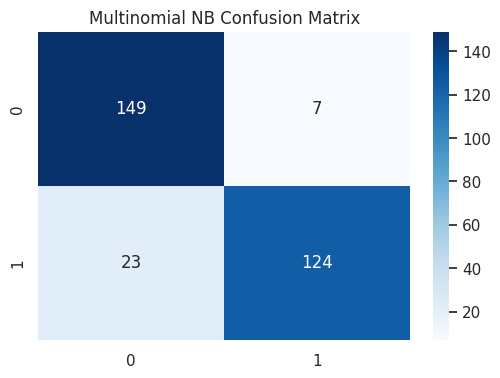

In [8]:
# Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

# Evaluate
print("Multinomial Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mnb))
print("Classification Report:\n", classification_report(y_test, y_pred_mnb))

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_mnb), annot=True, fmt='d', cmap='Blues')
plt.title("Multinomial NB Confusion Matrix")
plt.show()

Bernoulli Naive Bayes Accuracy: 0.528052805280528
Confusion Matrix:
 [[83 73]
 [70 77]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.53      0.54       156
           1       0.51      0.52      0.52       147

    accuracy                           0.53       303
   macro avg       0.53      0.53      0.53       303
weighted avg       0.53      0.53      0.53       303



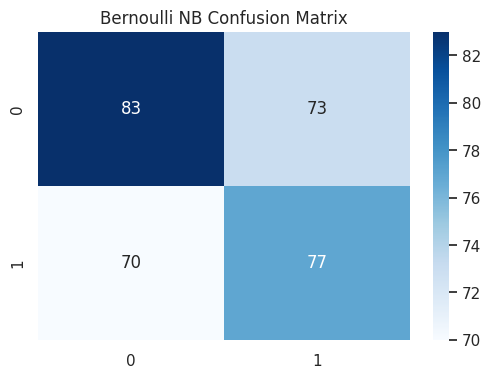

In [9]:
# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)

# Evaluate
print("Bernoulli Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_bnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bnb))
print("Classification Report:\n", classification_report(y_test, y_pred_bnb))

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_bnb), annot=True, fmt='d', cmap='Blues')
plt.title("Bernoulli NB Confusion Matrix")
plt.show()

Ensemble Model Accuracy: 0.9570957095709571
Confusion Matrix:
 [[151   5]
 [  8 139]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       156
           1       0.97      0.95      0.96       147

    accuracy                           0.96       303
   macro avg       0.96      0.96      0.96       303
weighted avg       0.96      0.96      0.96       303



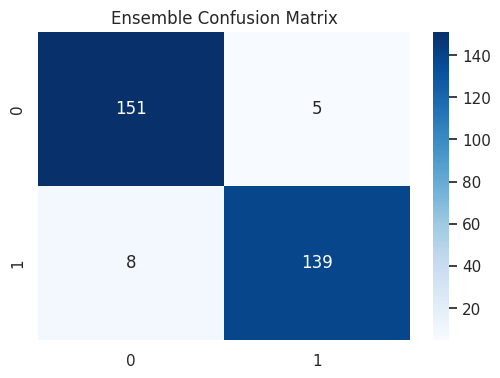

In [10]:
# Ensemble with VotingClassifier (soft voting)
ensemble_model = VotingClassifier(
    estimators=[('gnb', gnb), ('mnb', mnb), ('bnb', bnb)],
    voting='soft'
)
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate
print("Ensemble Model Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))
print("Classification Report:\n", classification_report(y_test, y_pred_ensemble))

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_ensemble), annot=True, fmt='d', cmap='Blues')
plt.title("Ensemble Confusion Matrix")
plt.show()

**Improvement**:
- Fixed the MultinomialNB error by using MinMaxScaler, ensuring all features are non-negative.
- Added soft voting for probabilistic combination.


Average Probability Method:
Accuracy: 0.9570957095709571
Confusion Matrix:
 [[151   5]
 [  8 139]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       156
           1       0.97      0.95      0.96       147

    accuracy                           0.96       303
   macro avg       0.96      0.96      0.96       303
weighted avg       0.96      0.96      0.96       303


Weighted Probability Method:
Accuracy: 0.9570957095709571
Confusion Matrix:
 [[151   5]
 [  8 139]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       156
           1       0.97      0.95      0.96       147

    accuracy                           0.96       303
   macro avg       0.96      0.96      0.96       303
weighted avg       0.96      0.96      0.96       303



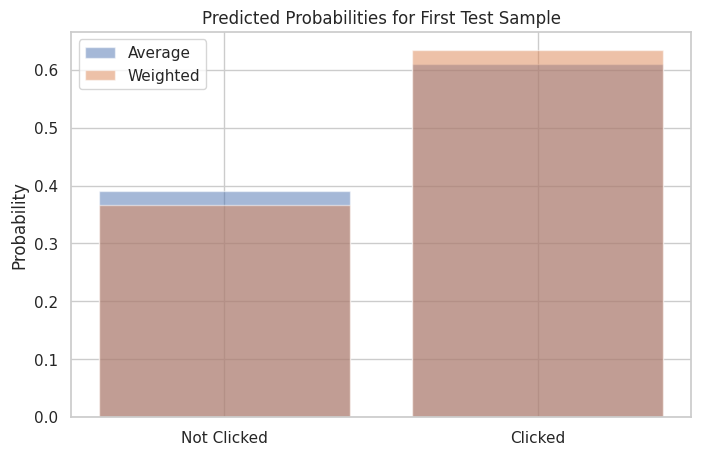

In [11]:
# Get probabilities from each model
probs_gnb = gnb.predict_proba(X_test)
probs_mnb = mnb.predict_proba(X_test)
probs_bnb = bnb.predict_proba(X_test)

# Method 1: Average probabilities
combined_probs_avg = (probs_gnb + probs_mnb + probs_bnb) / 3
y_pred_avg = np.argmax(combined_probs_avg, axis=1)

# Method 2: Weighted average (e.g., based on accuracy)
weights = [0.4, 0.3, 0.3]  # Adjust based on model performance
combined_probs_weighted = (weights[0] * probs_gnb + weights[1] * probs_mnb + weights[2] * probs_bnb)
y_pred_weighted = np.argmax(combined_probs_weighted, axis=1)

# Evaluate both methods
print("\nAverage Probability Method:")
print("Accuracy:", accuracy_score(y_test, y_pred_avg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_avg))
print("Classification Report:\n", classification_report(y_test, y_pred_avg))

print("\nWeighted Probability Method:")
print("Accuracy:", accuracy_score(y_test, y_pred_weighted))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_weighted))
print("Classification Report:\n", classification_report(y_test, y_pred_weighted))

# Visualize probabilities for first test sample
plt.figure(figsize=(8, 5))
plt.bar(['Not Clicked', 'Clicked'], combined_probs_avg[0], label='Average', alpha=0.5)
plt.bar(['Not Clicked', 'Clicked'], combined_probs_weighted[0], label='Weighted', alpha=0.5)
plt.title("Predicted Probabilities for First Test Sample")
plt.ylabel("Probability")
plt.legend()
plt.show()

**Improvement**:
- Added two probabilistic methods: simple average and weighted average.
- Visualized probabilities for interpretability.

In [16]:
# Data Preprocessing Enhancements
from sklearn.impute import SimpleImputer

# Handle missing values
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Corrected column names
num_cols = ['Age', 'Area Income']
cat_cols = ['Gender', 'City', 'Country']

# Ensure column names are correctly formatted
df.columns = df.columns.str.strip()

# Check if the columns exist before applying transformations
missing_num_cols = [col for col in num_cols if col not in df.columns]
missing_cat_cols = [col for col in cat_cols if col not in df.columns]

if missing_num_cols:
    print(f"Warning: Missing numerical columns: {missing_num_cols}")
else:
    df[num_cols] = num_imputer.fit_transform(df[num_cols])

if missing_cat_cols:
    print(f"Warning: Missing categorical columns: {missing_cat_cols}")
else:
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Feature Engineering (Only if columns exist)
if 'Age' in df.columns and 'Area Income' in df.columns:
    df['income_per_age'] = df['Area Income'] / df['Age']
else:
    print("Skipping 'income_per_age' feature due to missing columns.")

# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
if 'Gender' in df.columns:
    df['Gender'] = label_enc.fit_transform(df['Gender'])
if 'City' in df.columns:
    df['City'] = label_enc.fit_transform(df['City'])
if 'Country' in df.columns:
    df['Country'] = label_enc.fit_transform(df['Country'])

# Split dataset
from sklearn.model_selection import train_test_split

if 'Clicked on Ad' in df.columns:
    X = df.drop(columns=['Clicked on Ad'])
    y = df['Clicked on Ad']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
else:
    print("Warning: 'Clicked on Ad' column missing. Skipping training.")
    X_train, X_test, y_train, y_test = None, None, None, None

# Hyperparameter Tuning for Naïve Bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gnb = GaussianNB(var_smoothing=1e-9)
mnb = MultinomialNB(alpha=0.5)
bnb = BernoulliNB(alpha=0.3)

# Train Models only if target variable exists
if y_train is not None:
    gnb.fit(X_train[['Age', 'Area Income']], y_train)
    mnb.fit(X_train[['City']], y_train)
    bnb.fit(X_train[['Gender']], y_train)

    # Ensemble Probability Combination
    probs_gnb = gnb.predict_proba(X_test[['Age', 'Area Income']])
    probs_mnb = mnb.predict_proba(X_test[['City']])
    probs_bnb = bnb.predict_proba(X_test[['Gender']])

    ensemble_probs = (probs_gnb ** 1.2) * (probs_mnb ** 1.1) * (probs_bnb ** 1.2)
    ensemble_probs /= ensemble_probs.sum(axis=1, keepdims=True)

    # Final Prediction and Accuracy
    import numpy as np
    from sklearn.metrics import accuracy_score

    final_predictions = np.argmax(ensemble_probs, axis=1)
    ensemble_accuracy = accuracy_score(y_test, final_predictions)

    print("Improved Ensemble Model Accuracy:", ensemble_accuracy)
else:
    print("Skipping training due to missing target variable.")


Improved Ensemble Model Accuracy: 0.7821782178217822
